# Simple Linear Regression, Minimal Example Practice

##### Agustin Gimenez, 05/26/2022

In [1]:
# import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#generate random input data to train on
no_observations = 1000

#random data
x = np.random.uniform(low=-10, high=10,size=(no_observations,1))
z = np.random.uniform(low=-10, high=10,size=(no_observations,1))

#lets combine the input variables in one matrix
inputs = np.column_stack((x,z))

print(inputs.shape)

(1000, 2)


In [3]:
# create targets = f(x,z) = 2x -3z + 5 + noise
noise = np.random.uniform(-1,1,(no_observations,1))
t = 2*x - 3*z + 5 + noise

print(t.shape)

(1000, 1)


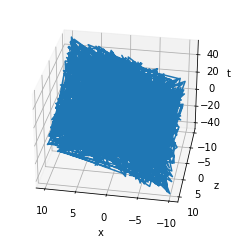

In [4]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
x = x.reshape(no_observations,)
z = z.reshape(no_observations,)
t = t.reshape(no_observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(x, z, t)

# Set labels
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('t')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we were just describing the plot. This method actually shows the plot. 
plt.show()

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
x = x.reshape(no_observations,1)
z = z.reshape(no_observations,1)
t = t.reshape(no_observations,1)

In [5]:
# create the algorithm
# Linear Model: y=xw+b

init_range = 0.1

# weights for two variables x and z
w = np.random.uniform(low=-init_range, high=init_range, size=(2,1))

# bias as a scalar
b = np.random.uniform(low=-init_range, high=init_range, size=1)

# learning rate (eta)
learning_rate = 0.02

### Train the model

In [10]:
for i in range (1000):
    
    y = np.dot(inputs,w) + b

    deltas = y - t
        
    loss = np.sum(deltas ** 2) / 2 / no_observations

    deltas_scaled = deltas / no_observations

    w = w - learning_rate * np.dot(inputs.T,deltas_scaled)
    b = b - learning_rate * np.sum(deltas_scaled)


In [11]:
# Compare result with desired target, i.e. f(x,z) = 2x -3z + 5 + noise
print(w,b)

[[ 1.9998149 ]
 [-3.00082263]] [5.00484521]
